In [299]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, mean_squared_error

In [253]:
hp = pd.read_csv('/content/Housing Price.csv')
hp

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400.0,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620.0,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910.0,3,1,1,no,no,no,no,no,0,no,furnished


In [254]:
print("The Shape of the dataset is :", hp.shape)
print("Number of Columns:", hp.shape[1])
print("Number of Rows:", hp.shape[0])

The Shape of the dataset is : (545, 13)
Number of Columns: 13
Number of Rows: 545


In [255]:
print("Columns in the dataset:", hp.columns)

Columns in the dataset: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


<Axes: >

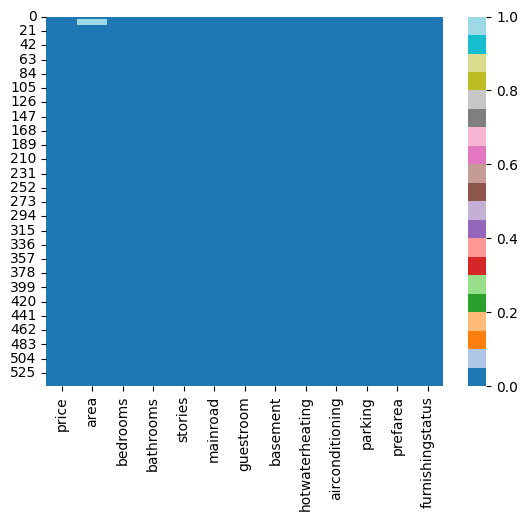

In [256]:
seaborn.heatmap(hp.isnull(), cmap = 'tab20')

In [257]:
print("Type of the data and other informations:")
hp.info()

Type of the data and other informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              536 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [258]:
hp.isnull().sum()

,0
price,0
area,9
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [259]:
#Handling null values

from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(hp[['area']])

hp['area'] = impute.transform(hp[['area']])
hp.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [260]:
#Removing duplicates

hp = hp.drop_duplicates()
hp.shape

(545, 13)

In [261]:
#Handling categorical variables

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

hp['mainroad'] = enc.fit_transform(hp['mainroad'])
hp['guestroom'] = enc.fit_transform(hp['guestroom'])
hp['basement'] = enc.fit_transform(hp['basement'])
hp['hotwaterheating'] = enc.fit_transform(hp['hotwaterheating'])
hp['airconditioning'] = enc.fit_transform(hp['airconditioning'])
hp['prefarea'] = enc.fit_transform(hp['prefarea'])
hp['furnishingstatus'] = hp['furnishingstatus'].map({'furnished':2,'unfurnished':0,'semi-furnished':1})

hp.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.000000,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960.000000,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960.000000,3,2,2,1,0,1,0,0,2,1,1
3,12215000,5087.304104,4,2,2,1,0,1,0,1,3,1,2
4,11410000,5087.304104,4,1,2,1,1,1,0,1,2,0,2


In [262]:
#Feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hp[hp.columns] = scaler.fit_transform(hp[hp.columns])
hp.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.413620,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.909091,0.524014,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.909091,0.595699,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.246402,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.836364,0.246402,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0


<Axes: >

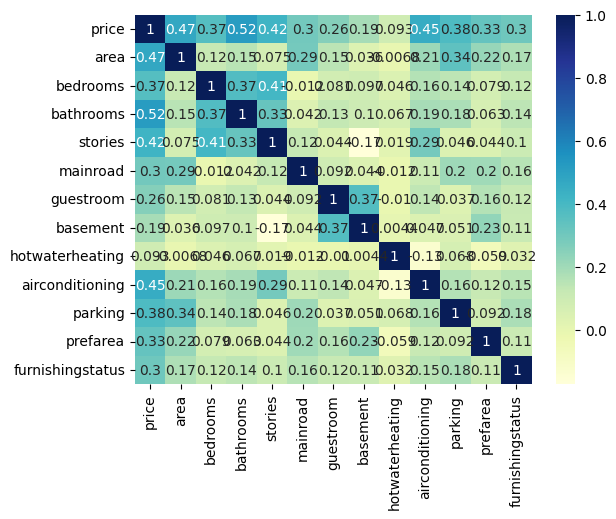

In [263]:
#Handling correlation

import seaborn as sns

hp_corr = hp.corr()
sns.heatmap(hp_corr, annot = True, cmap = 'YlGnBu')

In [264]:
to_drop = ['hotwaterheating']
hp = hp.drop(to_drop, axis=1)
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   airconditioning   545 non-null    float64
 9   parking           545 non-null    float64
 10  prefarea          545 non-null    float64
 11  furnishingstatus  545 non-null    float64
dtypes: float64(12)
memory usage: 51.2 KB


In [265]:
hp['price_range'] = pd.cut(hp['price'], bins=[0, 0.33, 0.66, 1], include_lowest=True, labels=['Low', 'Mid', 'High'])
label_encoder = LabelEncoder()
hp['price_range_encoded'] = label_encoder.fit_transform(hp['price_range'])  # Encodes 'Low', 'Mid', 'High' as 0, 1, 2

In [266]:
X = hp.drop(['price', 'price_range', 'price_range_encoded'], axis=1)

# Target variable (predicting 'price')
y = hp['price_range_encoded']

In [324]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,0.413620,0.6,0.333333,0.666667,1.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.524014,0.6,1.000000,1.000000,1.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.595699,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.666667,1.0,0.5
3,0.246402,0.6,0.333333,0.333333,1.0,0.0,1.0,1.0,1.000000,1.0,1.0
4,0.246402,0.6,0.000000,0.333333,1.0,1.0,1.0,1.0,0.666667,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
540,0.096774,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.666667,0.0,0.0
541,0.053763,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.141219,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
543,0.090323,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [325]:
y

,price_range_encoded
0,0
1,0
2,0
3,0
4,0
...,...
540,1
541,1
542,1
543,1


In [269]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [270]:
print("After splitting: ")
print("Training Data:: ", train_x.shape, train_y.shape)
print("Test Data: ", test_x.shape, test_y.shape)

After splitting: 
Training Data::  (381, 11) (381,)
Test Data:  (164, 11) (164,)


# DATASET TRAINING

***LINEAR REGRESSION***

In [271]:
#TRAINING THE MODEL
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(train_x, train_y)

LinearRegression()

In [272]:
# Training Accuracy
yPrediction = model1.predict(train_x.to_numpy())
yPredictedClasses = np.clip(np.round(yPrediction), 0, 2).astype(int)  # Ensures predictions fall in the range [0, 2]

accuracy = accuracy_score(train_y.to_numpy(), yPredictedClasses)
# accuracy = model1.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 85.04%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [273]:
#train_y = train_y.to_numpy()
#for i in range(len(yPredictedClasses)):
    #print(f"{yPredictedClasses[i]} -> {train_y[i]}")

***LOGISTIC REGRESSION***

In [274]:
# Training the model
logistic_reg = LogisticRegression(random_state=0).fit(train_x, train_y)

In [275]:
# Training Accuracy
accuracy = logistic_reg.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 86.88%


***K-Nearest Neighbors***

In [276]:
# Creating the KNN model
knn = KNeighborsClassifier(n_neighbors=13)

# Training the KNN model
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=13)

In [277]:
# Training Accuracy
accuracy = knn.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 86.35%


***Decision Tree***

In [278]:
# Training the Model
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt = dt.fit(train_x, train_y)

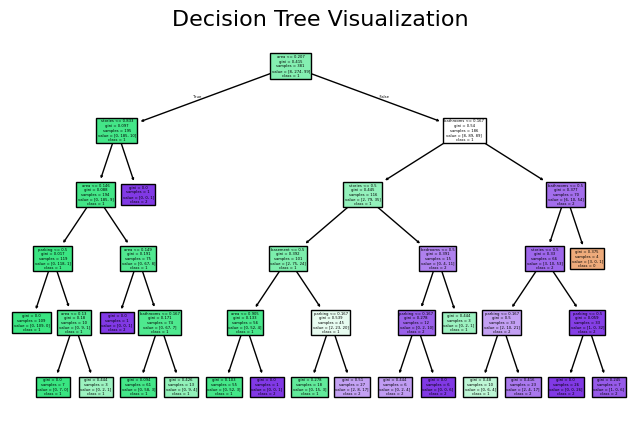

In [326]:
#The DT
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
# Convert class names to strings
class_names = [str(cls) for cls in dt.classes_]

plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


In [280]:
# Training Accuracy
accuracy = dt.score(train_x, train_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 89.76%


# DATASET TESTING

***LINEAR REGRESSION***

In [281]:
# Test Accuracy
yPrediction = model1.predict(test_x.to_numpy())
yPredictedClasses = np.clip(np.round(yPrediction), 0, 2).astype(int)  # Ensures predictions fall in the range [0, 2]

accuracy = accuracy_score(test_y.to_numpy(), yPredictedClasses)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 77.44%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***LOGISTIC REGRESSION***

In [282]:
# Test Accuracy
accuracy = logistic_reg.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 79.27%


***K-Nearest Neighbor***

In [283]:
# Test Accuracy
accuracy = knn.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 76.83%


***Decision Tree***

In [284]:
# Test Accuracy
accuracy = dt.score(test_x, test_y)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")

Accuracy of the model: 80.49%


# Result Analysis

In [285]:
def find_f1_score(confusion_matrix):
  true_positive = confusion_matrix[0][0]
  true_negative = confusion_matrix[1][1]
  false_positive = confusion_matrix[0][1]
  false_negative = confusion_matrix[1][0]
  recall = true_positive/(true_positive + false_negative)
  precision = true_positive/(true_positive + false_positive)
  f1_score = (2*precision*recall)/ (precision+recall)
  return (true_positive, false_positive, false_positive, false_negative, recall, precision, f1_score)

***LINEAR REGRESSION***

In [321]:
#lr_model = LinearRegression()
#lr_model.fit(train_x, train_y)

# Predict probabilities
y_pred_probs = model1.predict(test_x)
# Training Accuracy
yPrediction = model1.predict(test_x.to_numpy())
yPredictedClasses = np.clip(np.round(yPrediction), 0, 2).astype(int)  # Ensures predictions fall in the range [0, 2]
accuracy = accuracy_score(test_y, yPredictedClasses)
# Apply a threshold to convert probabilities to binary labels
threshold = 0.5
y_pred = (y_pred_probs >= threshold).astype(int)
report = classification_report(test_y, yPredictedClasses)

# Print Confusion Matrix and Classification Report
#print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
print("Accuracy Score:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.79      0.95      0.86       118
           2       0.65      0.36      0.46        42

    accuracy                           0.77       164
   macro avg       0.48      0.44      0.44       164
weighted avg       0.74      0.77      0.74       164

Accuracy Score: 0.774390243902439


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

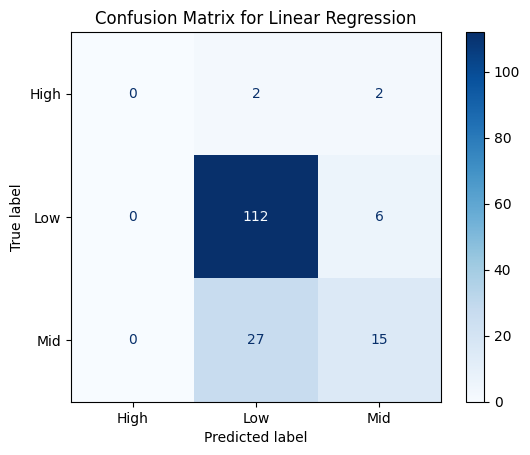

In [287]:
# confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, mean_squared_error
conf_matrix =ConfusionMatrixDisplay.from_predictions(test_y, yPredictedClasses, display_labels=label_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix for Linear Regression")
plt.show()

***LOGISTIC REGRESSION CLASSIFIER***

In [294]:
from sklearn.metrics import classification_report, accuracy_score

# Making predictions
predicted_labels = logistic_reg.predict(test_x)

# Generating the classification report with zero_division set to 0
class_report = classification_report(test_y, predicted_labels, zero_division=0)
print("Classification Report:")
print(class_report)

# Calculating accuracy
accuracy = accuracy_score(test_y, predicted_labels)
print("Accuracy Score:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.85      0.91      0.88       118
           2       0.61      0.55      0.57        42

    accuracy                           0.79       164
   macro avg       0.48      0.48      0.48       164
weighted avg       0.77      0.79      0.78       164

Accuracy Score: 0.7926829268292683


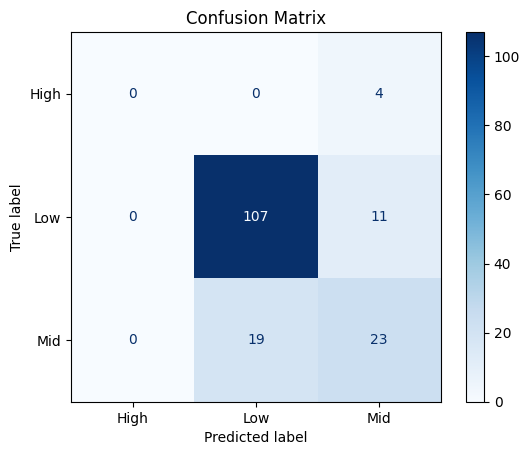

In [301]:
# Displaying the confusion matrix
ConfusionMatrixDisplay.from_predictions(test_y, predicted_labels, display_labels=label_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

***DECISION TREE***

In [302]:
predicted_labels = dt.predict(test_x)

class_report = classification_report(test_y, predicted_labels)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(test_y, predicted_labels)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.86      0.90      0.88       118
           2       0.63      0.57      0.60        42

    accuracy                           0.80       164
   macro avg       0.72      0.66      0.68       164
weighted avg       0.80      0.80      0.80       164

Accuracy Score: 0.8048780487804879


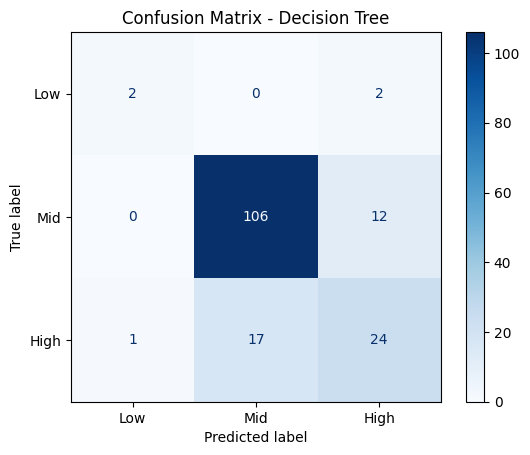

In [304]:
conf_matrix = confusion_matrix(test_y, predicted_labels)

# Display the confusion matrix with labels and a color map
ConfusionMatrixDisplay(conf_matrix, display_labels=["Low", "Mid", "High"]).plot(cmap='Blues')

plt.title("Confusion Matrix - Decision Tree")
plt.show()

***KNN***

In [306]:
from sklearn.metrics import classification_report, accuracy_score

# Making predictions
predicted_labels = knn.predict(test_x)

# Generating the classification report with zero_division set to 0
class_report = classification_report(test_y, predicted_labels, zero_division=0)
print("Classification Report:")
print(class_report)

# Calculating accuracy
accuracy = accuracy_score(test_y, predicted_labels)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.79      0.97      0.87       118
           2       0.63      0.29      0.39        42

    accuracy                           0.77       164
   macro avg       0.47      0.42      0.42       164
weighted avg       0.73      0.77      0.72       164

Accuracy Score: 0.7682926829268293


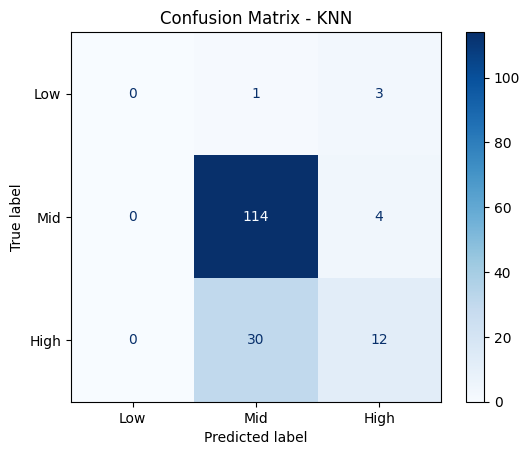

In [319]:
#confusion matrix
conf_matrix = confusion_matrix(test_y, predicted_labels)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=["Low", "Mid", "High"]).plot(cmap='Blues')

# Add title and show the confusion matrix
plt.title("Confusion Matrix - KNN")
plt.show()



# COMPARE THE ACCURACY


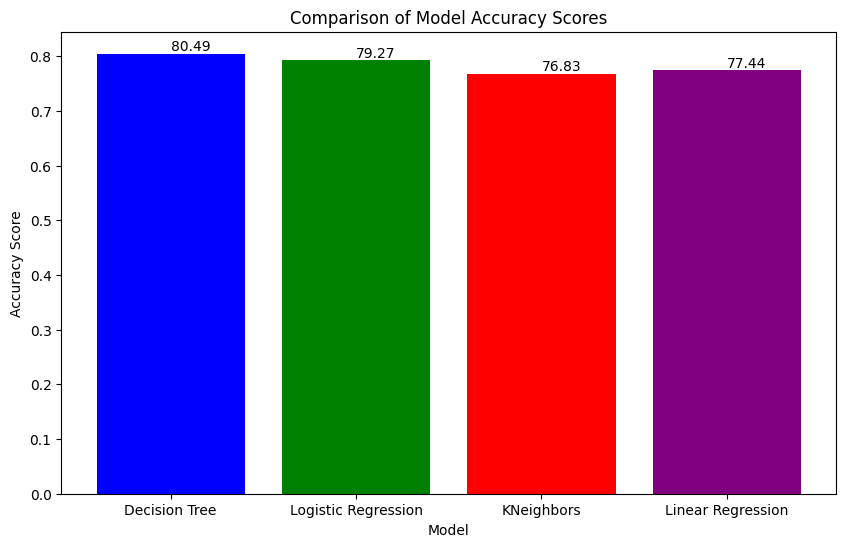

In [323]:
accuracy_scores = {
    'Decision Tree': 0.8048780487804879,
    'Logistic Regression': 0.7926829268292683,
    'KNeighbors': 0.7682926829268293,
    'Linear Regression': 0.774390243902439,
}

model_names = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scores, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

# Adding the text on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval*100, 2), va='bottom')  # va='bottom' to align the text correctly

plt.show()